# ipywidgets

The ipywidgets Python module is responsible for giving us easy interactivity. Detailed documentation is available at https://github.com/ipython/ipywidgets

In its simplest form, you begin by creating a function that returns something

In [1]:
def add_one(x=7):
    return(x+1)

In [2]:
add_one(5)

6

You then wrap this with the interact function from the ipywidgets module

In [3]:
from ipywidgets import interact
interact(add_one , x=(0,10));

8

Once we understand the basic mechanism, we can do something more interesting. For example, let's use the Python symbolic mathematics module, sympy, to return the series expansion of sin(x).

In [4]:
import sympy as sp
def expand_sin(num_terms=10):
    x = sp.symbols('x')
    expr = sp.sin(x)
    return( expr.series(x, 0, num_terms) )

expand_sin(6)

x - x**3/6 + x**5/120 + O(x**6)

Wrapping this with interact allows us to control the number of terms in the expansion very easily

In [5]:
interact(expand_sin,num_terms=(0,100));

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 + O(x**10)

You may prefer some nicer formmating. The following sympy commands switches to a prettier output format.

In [6]:
from sympy import init_printing
init_printing() 

Now, the output looks much better!

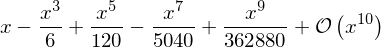

In [7]:
interact(expand_sin,num_terms=(0,100));

With a little more work, we can plot the series against sin(x)

In [8]:
from sympy.utilities.lambdify import lambdify
import numpy as np
import matplotlib.pyplot as plt
def plot_series(n=2):
    #Find the series expansion and remove the Order(X^n) term
    sin_series = expand_sin(n).removeO()
    #Create a version of this series that can evaluate a numpy array
    x = sp.symbols('x')
    eval_series = lambdify(x, sin_series, modules=['numpy'])
    #Create the plot
    xvals = np.linspace(-2*np.pi, 2*np.pi, 100)
    plt.plot(xvals, eval_series(xvals))
    plt.plot(xvals, np.sin(xvals))
    #Set axes
    axes = plt.gca()
    axes.set_ylim([-4,4])
    axes.set_xlim([-np.pi*2,np.pi*2])


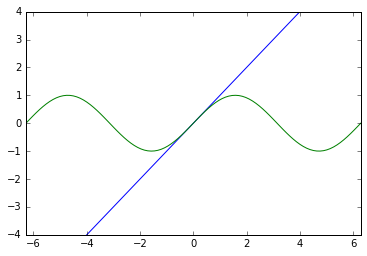

In [9]:
plot_series(2)

Although a little more complex, this function is simlar to all of the others we've looked at in that it has an input and an output. 

As such, we can use interact with it.

Wrapping this as an interact gives us

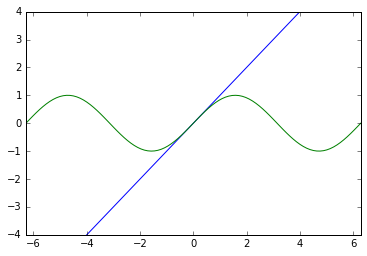

In [10]:
interact(plot_series,n=(2,50));

Even though it's the most basic ipywidgets interface available, we can build quite complex GUIs with the interact function

In [11]:
from sympy.utilities.lambdify import lambdify
import numpy as np
import matplotlib.pyplot as plt
from sympy.parsing.sympy_parser import parse_expr
def advanced_plot_series(n=3,show_function=True,show_series=True,function='sin'):
    
    #Parse the expression
    function = function + '(x)'
    function = parse_expr(function)
    x = sp.symbols('x')
    #Find the series expansion and remove the Order(X^n) term
    series = function.series(x, 0, n) 
    series = series.removeO()
    #Create a version of this series that can evaluate a numpy array
    eval_series = lambdify(x, series, modules=['numpy'])
    eval_func = lambdify(x,function,modules=['numpy'])
    #Create the plot
    xvals = np.linspace(-2*np.pi, 2*np.pi, 100)
    if(show_series):
        plt.plot(xvals, eval_series(xvals))
    if(show_function):
        plt.plot(xvals, eval_func(xvals))
    #Set axes
    axes = plt.gca()
    axes.set_ylim([-4,4])
    axes.set_xlim([-np.pi*2,np.pi*2])

This function has multiple arguments which leads to multiple controls

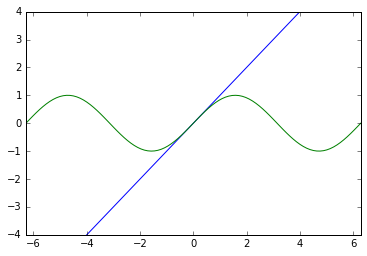

In [12]:
interact(advanced_plot_series,
         n=(2,50),
         show_function=True,
         function=('sin','cos','tan')
         );